# Assignment-04-Simple Linear Regression-1

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# import dataset
df=pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA and Data Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: >

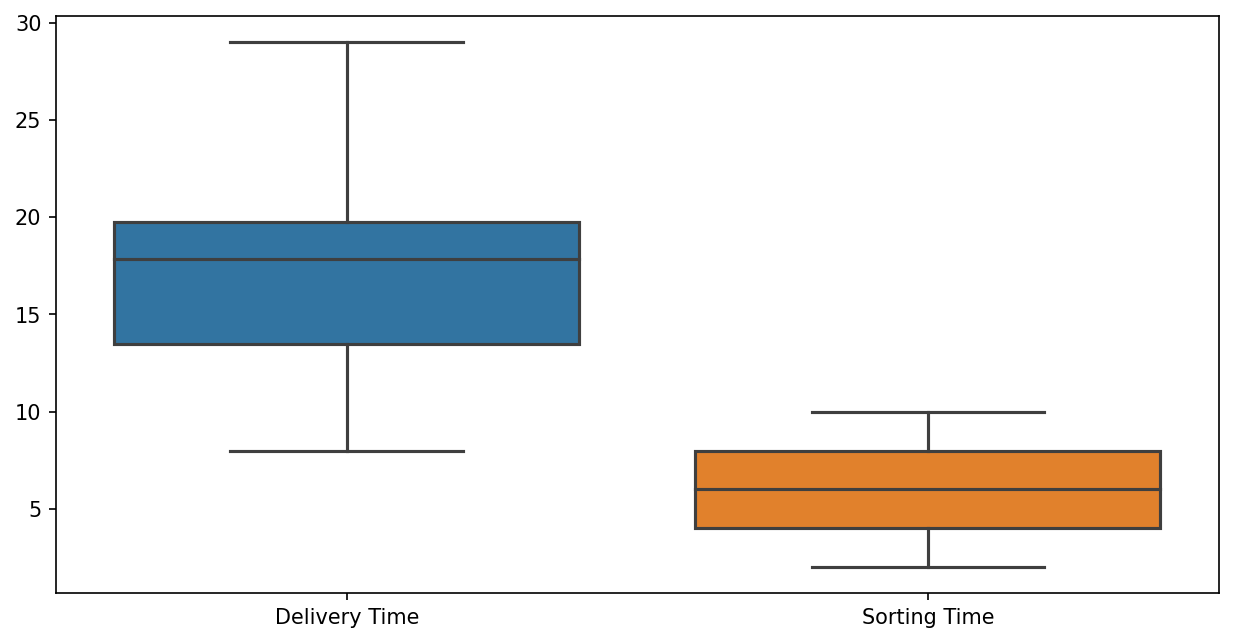

In [5]:
sns.boxplot(data=df)

<Axes: xlabel='Delivery Time', ylabel='Density'>

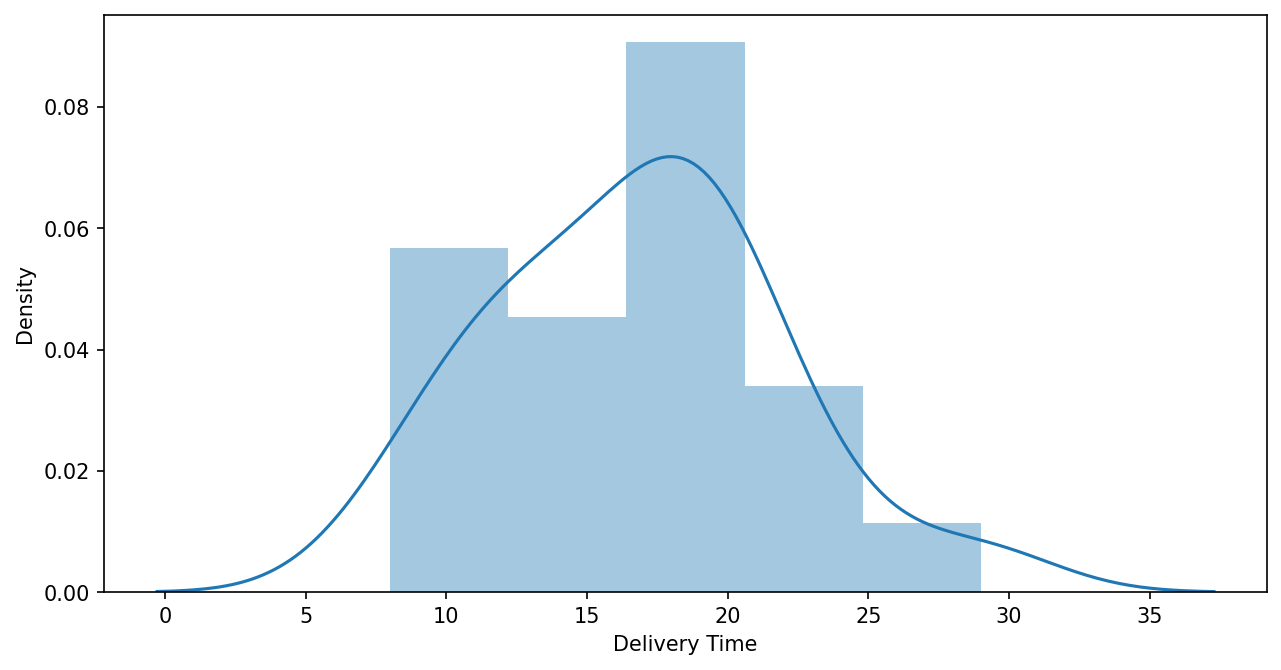

In [6]:
sns.distplot(df['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

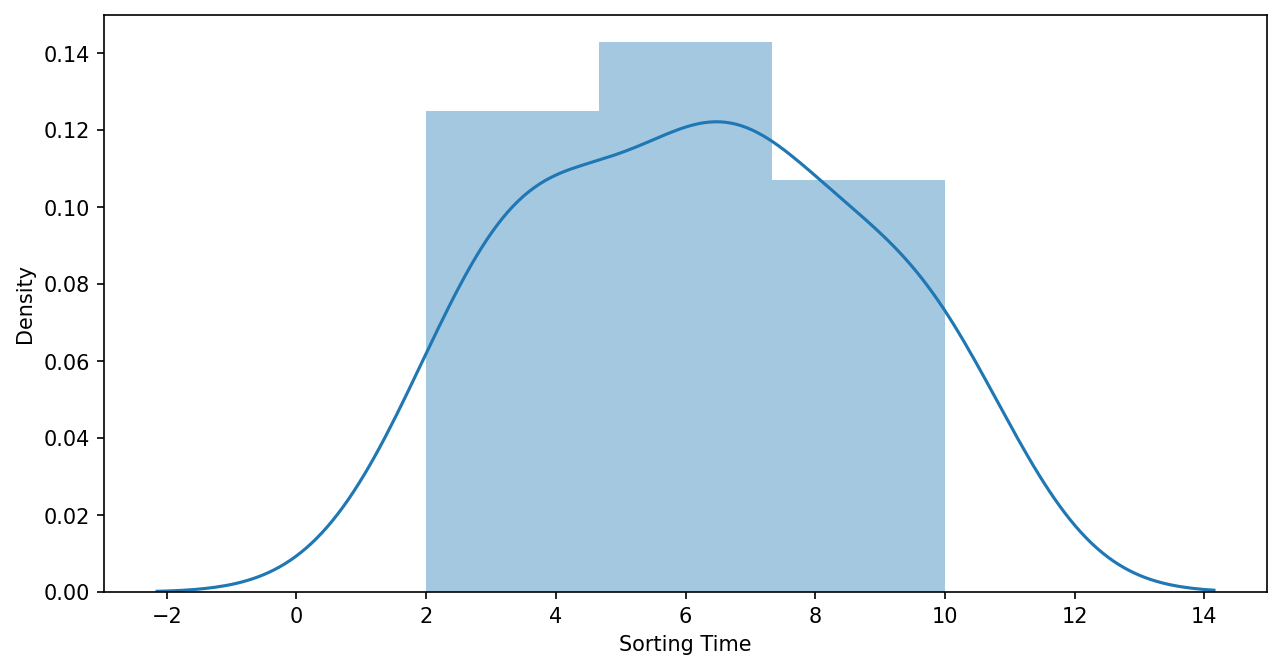

In [7]:
sns.distplot(df['Sorting Time'])

In [8]:
df['Delivery Time'].corr(df['Sorting Time'])

0.8259972607955326

In [9]:
np.corrcoef(df['Delivery Time'],df['Sorting Time'])

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

Text(0, 0.5, 'Sorting Time')

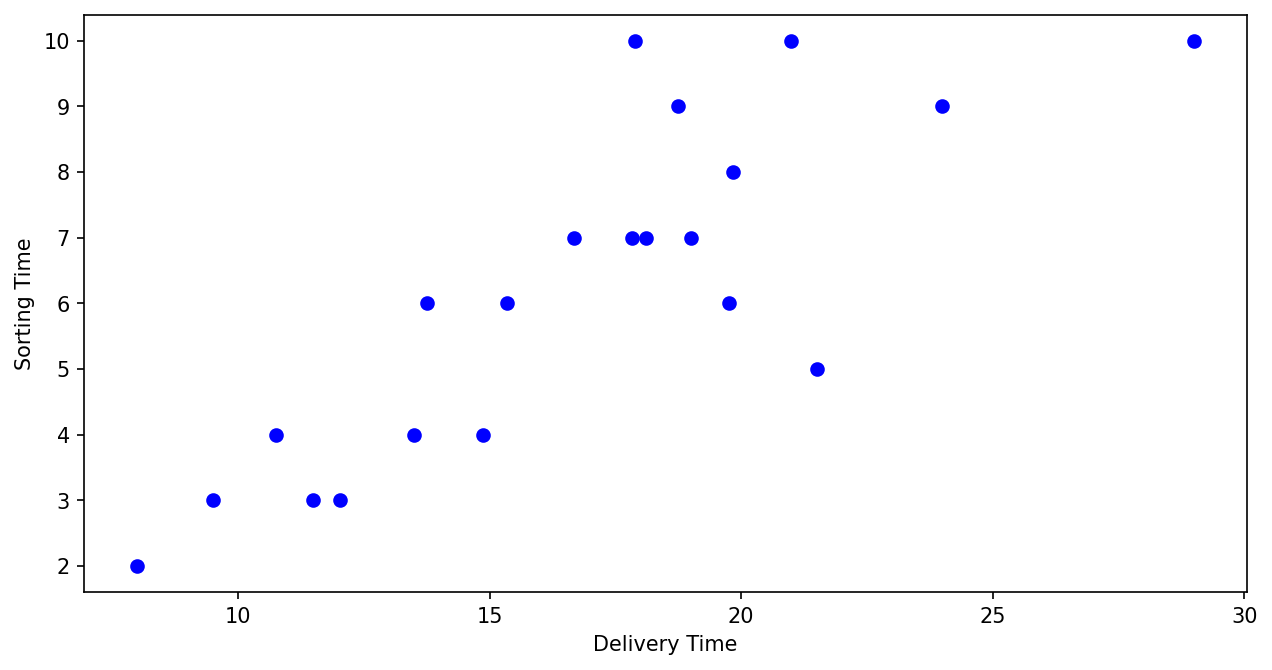

In [10]:
plt.plot(df['Delivery Time'],df['Sorting Time'],"bo")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")

## Feature Engineering

In [11]:
# Renaming Columns
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Correlation Analysis

In [12]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

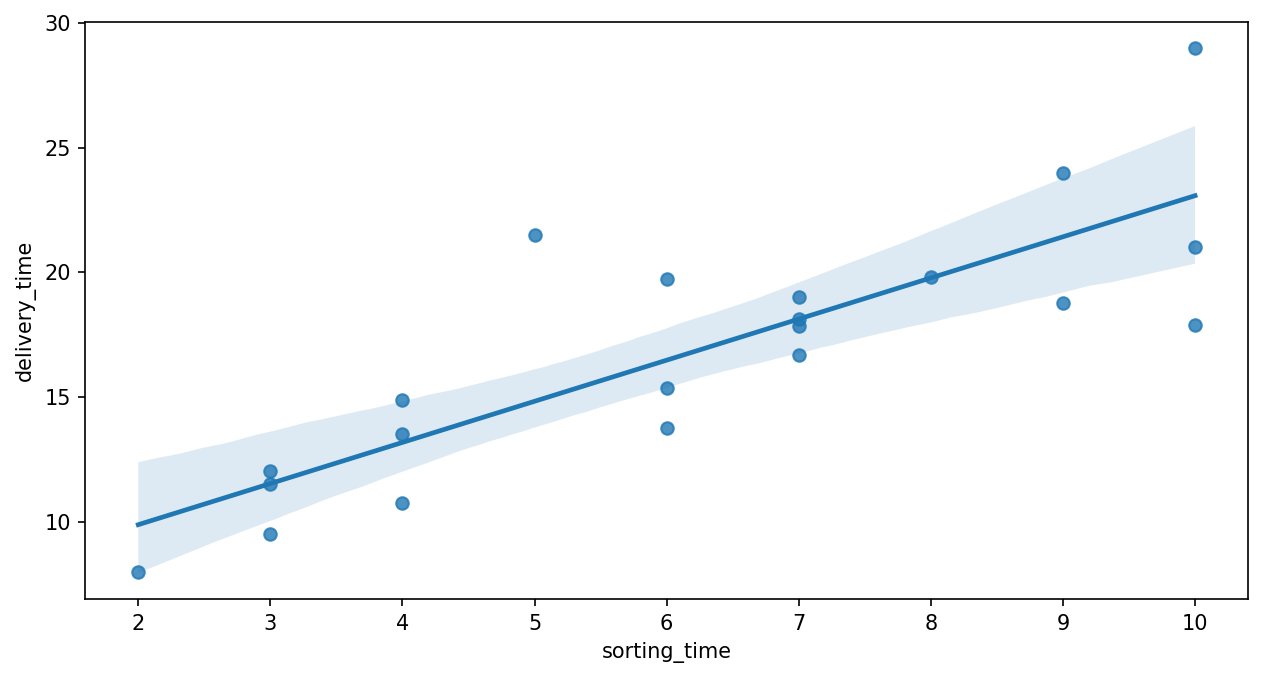

In [13]:
sns.regplot(x=df['sorting_time'],y=df['delivery_time'])

## Model Building Using Log Transformation

In [14]:
# Transforming variables for accuracy
model2 = smf.ols('delivery_time~np.log(sorting_time)',data=df).fit()

In [15]:
model2.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [16]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           2.64e-06
Time:                        20:09:10   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
print(model2.conf_int(0.01)) # 99% confidence level

                             0          1
Intercept            -5.862666   8.182033
np.log(sorting_time)  5.115458  12.971369


In [18]:
pred2 = model2.predict(pd.DataFrame(df['sorting_time']))
pred2.corr(df['delivery_time'])

0.8339325279256244

In [19]:
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

Text(0, 0.5, 'delivery_time')

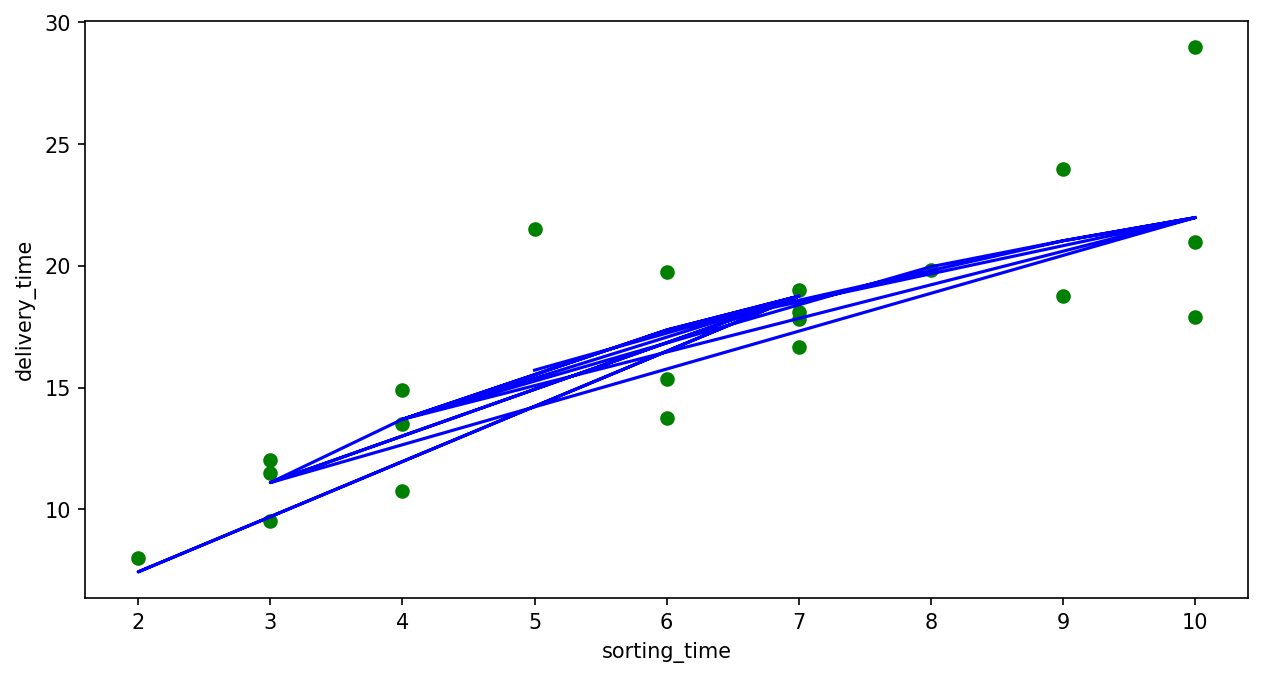

In [20]:
plt.scatter(x=df['sorting_time'],y=df['delivery_time'],color='green')
plt.plot(df['sorting_time'],pred2,color='blue')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time')

In [21]:
# Finding Rsquared Values
model2.rsquared , model2.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

## Model Predictions

In [22]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [23]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [24]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [25]:
model2.predict(data_pred)

0    15.714496
1    19.964933
dtype: float64

In [26]:
# Exponential transformation
model3 = smf.ols('np.log(delivery_time)~sorting_time',data=df).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Wed, 20 Dec 2023   Prob (F-statistic):           1.59e-06
Time:                           20:09:11   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
print(model3.conf_int(0.01)) # 99% confidence level

                     0         1
Intercept     1.826774  2.415969
sorting_time  0.061378  0.149725


In [28]:
pred_log = model3.predict(pd.DataFrame(df['sorting_time']))
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [29]:
pred3=np.exp(pred_log)  # as we have used log(Delivery Time) in preparing model so we need to convert it back
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [30]:
# Finding Rsquared Values
model3.rsquared , model3.rsquared_adj

(0.7109478980584187, 0.6957346295351776)

In [31]:
# Finding Rsquared Values
model2.rsquared , model2.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

In [32]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [33]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [34]:
model3.predict(data_pred)

0    2.649130
1    2.965785
dtype: float64